In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn import tree, metrics
from io import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [2]:
drafted = pd.read_csv('drafted_2006.csv')
undrafted = pd.read_csv('undrafted_2006.csv')
draft_df = pd.read_csv('career_df_2006.csv')

In [3]:
drafted.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,CarAV,DrAV,Solo,Int,Sacks,Drafted,Solos_Per_Year,Ints_Per_Year,Sacks_Per_Year,Solos_Per_Game
0,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.000000,30.5,103.0,...,0.0,NaN,1.0,0.0,0.0,D,0.33,0.00,0.00,0.020625
1,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.000000,32.0,112.0,...,13.0,13.0,109.0,0.0,3.0,D,36.33,0.00,1.00,2.270625
2,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.000000,39.5,131.0,...,13.0,9.0,213.0,15.0,0.0,D,35.50,2.50,0.00,2.218750
3,2006.0,Jon Alston,Stanford,OLB,72.75,223.0,4.53,30.000000,40.0,132.0,...,6.0,0.0,51.0,0.0,0.0,D,17.00,0.00,0.00,1.062500
4,2006.0,James Anderson,Virginia Tech,OLB,74.75,229.0,4.62,21.839506,41.0,121.0,...,31.0,25.0,421.0,3.0,12.0,D,46.78,0.33,1.33,2.923750


In [4]:
undrafted.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,2006.0,Sir Henry Anderson,Oregon State,DT,75.88,306.0,5.23,27.0,28.5,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Eric Bassey,Oklahoma,CB,71.88,195.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
4,2006.0,Brett Bell,Wisconsin,CB,72.25,190.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U


In [5]:
draft_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.0,30.5,103.0,...,2009.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,D
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.0,32.0,112.0,...,2009.0,0.0,0.0,2.0,13.0,13.0,109.0,NaN,3.0,D
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.0,39.5,131.0,...,2012.0,0.0,0.0,1.0,13.0,9.0,213.0,15.0,NaN,D


In [6]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             168 non-null    float64
 1   Name             168 non-null    object 
 2   College          168 non-null    object 
 3   POS              168 non-null    object 
 4   Height (in)      168 non-null    float64
 5   Weight (lbs)     168 non-null    float64
 6   40 Yard          132 non-null    float64
 7   Bench Press      115 non-null    float64
 8   Vert Leap (in)   128 non-null    float64
 9   Broad Jump (in)  129 non-null    float64
 10  Shuttle          108 non-null    float64
 11  3Cone            101 non-null    float64
 12  Win-Loss Record  155 non-null    object 
 13  Round            108 non-null    float64
 14  Pick             108 non-null    float64
 15  Team             108 non-null    object 
 16  Age              101 non-null    float64
 17  To              

In [7]:
draft_df['Broad Jump (in)'].replace(np.nan, np.mean(draft_df['Broad Jump (in)']), inplace=True)
draft_df['Bench Press'].replace(np.nan, np.mean(draft_df['Bench Press']), inplace=True)
draft_df['40 Yard'].replace(np.nan, np.mean(draft_df['40 Yard']), inplace=True)
draft_df['Vert Leap (in)'].replace(np.nan, np.mean(draft_df['Vert Leap (in)']), inplace=True)
draft_df['Shuttle'].replace(np.nan, np.mean(draft_df['Shuttle']), inplace=True)
draft_df['3Cone'].replace(np.nan, np.mean(draft_df['3Cone']), inplace=True)

In [8]:
drafted['PB_Select'] = 0
drafted.loc[drafted['PB'] > 0, 'PB_Select'] = 1
drafted.PB_Select

0      0
1      0
2      0
3      0
4      0
      ..
103    1
104    0
105    0
106    0
107    0
Name: PB_Select, Length: 108, dtype: int64

In [9]:
drafted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             108 non-null    float64
 1   Name             108 non-null    object 
 2   College          108 non-null    object 
 3   POS              108 non-null    object 
 4   Height (in)      108 non-null    float64
 5   Weight (lbs)     108 non-null    float64
 6   40 Yard          108 non-null    float64
 7   Bench Press      108 non-null    float64
 8   Vert Leap (in)   108 non-null    float64
 9   Broad Jump (in)  108 non-null    float64
 10  Shuttle          108 non-null    float64
 11  3Cone            108 non-null    float64
 12  Win-Loss Record  98 non-null     object 
 13  Round            108 non-null    float64
 14  Pick             108 non-null    float64
 15  Team             108 non-null    object 
 16  Age              101 non-null    float64
 17  To              

# Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y = (drafted.PB_Select == 1).values
X = drafted[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone', 'Int', 'Sacks', 'Solos_Per_Year']].values
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, test_size=0.30, random_state=123)

X_scaled = preprocessing.scale(Xlr)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(X_scaled, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.15151515151515152


In [11]:
logreg = LogisticRegression()
logreg.fit(X_scaled, ylr)
y_pred = logreg.predict(Xtestlr)

print(confusion_matrix(ytestlr, y_pred))
print(classification_report(ytestlr, y_pred))

[[ 0 28]
 [ 0  5]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        28
        True       0.15      1.00      0.26         5

    accuracy                           0.15        33
   macro avg       0.08      0.50      0.13        33
weighted avg       0.02      0.15      0.04        33



C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [13]:
clf = LogisticRegression()
score = cv_score(clf, X_scaled, ylr)
print(score)

0.9066666666666668


In [14]:
# your turn
from sklearn.model_selection import GridSearchCV

params = {'C': [0.001, 0.1, 1, 10, 100]}
clfl3 = LogisticRegression()
clf_fit = GridSearchCV(clfl3, param_grid=params, cv=5, scoring='accuracy')
clf_fit.fit(X_scaled, ylr)

clf_fit.best_estimator_, clf_fit.best_params_, clf_fit.best_score_

(LogisticRegression(C=1), {'C': 1}, 0.9066666666666666)

In [15]:
clfl4=LogisticRegression(C=clf_fit.best_params_['C'])
clfl4.fit(X_scaled, ylr)
ylrpred1 = clfl4.predict(Xtestlr)
accuracy_score(ylrpred1, ytestlr)

0.15151515151515152

# Desicion Tree

In [16]:
draft_df.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', 'Win-Loss Record', 'Round', 'Pick', 'Team', 'Age',
       'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'Solo', 'Int', 'Sacks',
       'Drafted'],
      dtype='object')

In [17]:
y = draft_df.Drafted
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [18]:
draft_dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

draft_dt2.fit(X_train, y_train)

y_pred = draft_dt2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_dt2

DecisionTreeClassifier(criterion='entropy', max_depth=3)

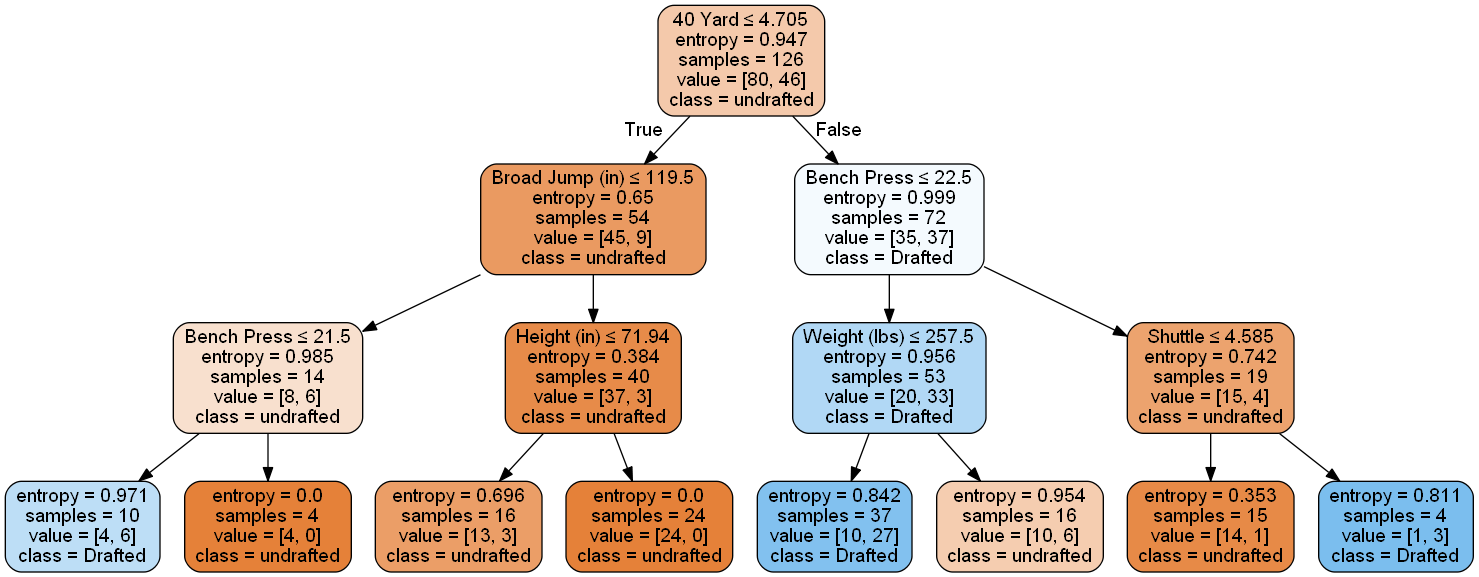

In [19]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_dt2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Entropy max_depth = 3
Accuracy: 0.7380952380952381
Balanced accuracy: 0.7142857142857143
Precision score 0.8148148148148148
Recall score 0.6428571428571429


In [21]:
draft_gini2 = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)

draft_gini2.fit(X_train, y_train)

y_pred = draft_gini2.predict(X_test)

y_pred = pd.Series(y_pred)

draft_gini2

DecisionTreeClassifier(max_depth=3)

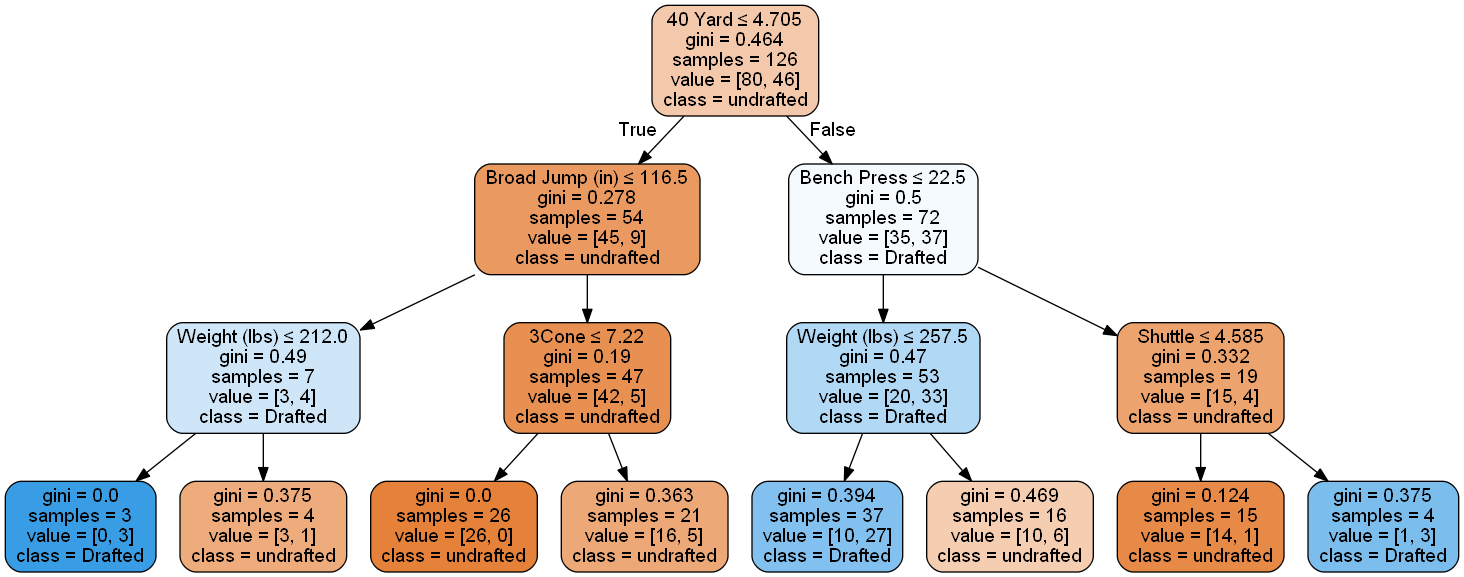

In [22]:
# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(draft_gini2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["undrafted", "Drafted"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
# Run this block for model evaluation
print("Model Entropy max_depth = 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Model Entropy max_depth = 3
Accuracy: 0.7142857142857143
Balanced accuracy: 0.6785714285714286
Precision score 0.7857142857142857
Recall score 0.5714285714285714


# Random Forest

In [24]:
draft_rf1 = RandomForestClassifier(max_depth=5, random_state=123)

draft_rf1.fit(X_train, y_train)

y_pred = draft_rf1.predict(X_test)

y_pred = pd.Series(y_pred)

draft_rf1

RandomForestClassifier(max_depth=5, random_state=123)

In [25]:
print("Random Forest Model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "D"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "U"))

Random Forest Model - max depth 3
Accuracy: 0.7142857142857143
Balanced accuracy: 0.6785714285714286
Precision score 0.7857142857142857
Recall score 0.5714285714285714


# Gradient Boosting

In [26]:
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier


In [27]:
drafted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             108 non-null    float64
 1   Name             108 non-null    object 
 2   College          108 non-null    object 
 3   POS              108 non-null    object 
 4   Height (in)      108 non-null    float64
 5   Weight (lbs)     108 non-null    float64
 6   40 Yard          108 non-null    float64
 7   Bench Press      108 non-null    float64
 8   Vert Leap (in)   108 non-null    float64
 9   Broad Jump (in)  108 non-null    float64
 10  Shuttle          108 non-null    float64
 11  3Cone            108 non-null    float64
 12  Win-Loss Record  98 non-null     object 
 13  Round            108 non-null    float64
 14  Pick             108 non-null    float64
 15  Team             108 non-null    object 
 16  Age              101 non-null    float64
 17  To              

In [28]:
drafted_num = drafted.select_dtypes(include=['float64'])
drafted_num.shape

(108, 25)

In [29]:
y = drafted[['PB_Select']]
X = drafted[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone', 'Solos_Per_Year']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25)


In [30]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=10, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.901
Accuracy score (validation): 0.815

Learning rate:  0.1
Accuracy score (training): 0.901
Accuracy score (validation): 0.778

Learning rate:  0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.778

Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.741

Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.741

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.778



C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

In [31]:
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(score)

cm = confusion_matrix(y_test, y_pred)
print(cm)

cr = classification_report(y_test, y_pred)
print(cr)

0.8148148148148148
[[21  1]
 [ 4  1]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        22
           1       0.50      0.20      0.29         5

    accuracy                           0.81        27
   macro avg       0.67      0.58      0.59        27
weighted avg       0.78      0.81      0.78        27



C:\Users\vtkurt13\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


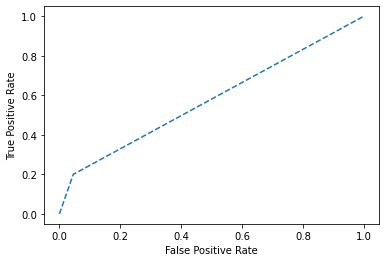

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

In [33]:
draft_df['Drafted'] = draft_df.Drafted.replace(['D', 'U'], [1, 0])
draft_df.Drafted.unique()

array([0, 1], dtype=int64)

[-0.  0. -0.  0.  0.  0. -0. -0.]


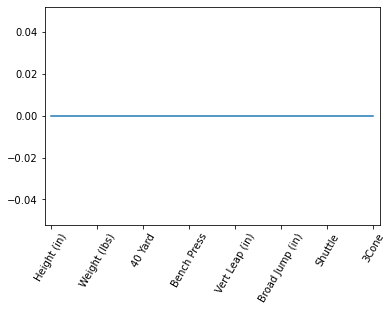

In [34]:
# Import Lasso
from sklearn.linear_model import Lasso


y = draft_df['Drafted']
X = draft_df[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.75, test_size=0.25)

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso.fit(X_scaled, y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X_scaled, y).coef_
print(lasso_coef)
drafted_columns = X.columns
#Plot the coefficients
plt.plot(range(len(drafted_columns)), lasso_coef)
plt.xticks(range(len(drafted_columns)), drafted_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

# Unsupervised Learning

In [35]:
unlabeled_draft = draft_df.drop('Drafted', axis=1)
unlabeled_draft = unlabeled_draft.select_dtypes(include=['float64'])
unlabeled_draft = unlabeled_draft.dropna(axis=1)
unlabeled_draft = unlabeled_draft.drop('Year', axis=1)
scaler = preprocessing.StandardScaler().fit(unlabeled_draft)
unlabeled_scaled = scaler.transform(unlabeled_draft)
unlabeled_scaled = pd.DataFrame(unlabeled_scaled)
unlabeled_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       168 non-null    float64
 1   1       168 non-null    float64
 2   2       168 non-null    float64
 3   3       168 non-null    float64
 4   4       168 non-null    float64
 5   5       168 non-null    float64
 6   6       168 non-null    float64
 7   7       168 non-null    float64
dtypes: float64(8)
memory usage: 10.6 KB


In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(unlabeled_scaled)
print(pca.explained_variance_)
print(pca.components_)

[4.79685048 1.0308636 ]
[[ 0.2483743   0.3857988   0.4068131   0.26504754 -0.36531097 -0.38855077
   0.35882133  0.37489443]
 [-0.63504305 -0.36581911  0.13057804 -0.42437137 -0.36106936 -0.29985207
   0.12723116  0.17112835]]


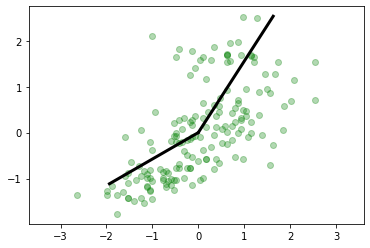

In [37]:
plt.plot(unlabeled_scaled.iloc[:, 0], unlabeled_scaled.iloc[:, 1], 'og', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

In [38]:
clf = PCA(0.95)
unlabeled_trans = clf.fit_transform(unlabeled_scaled)
print(unlabeled_scaled.shape)
print(unlabeled_trans.shape)

(168, 8)
(168, 6)


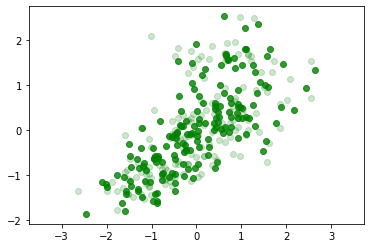

In [39]:
unlabeled_new = clf.inverse_transform(unlabeled_trans)
plt.plot(unlabeled_scaled.iloc[:, 0], unlabeled_scaled.iloc[:, 1], 'og', alpha=0.2)
plt.plot(unlabeled_new[:, 0], unlabeled_new[:, 1], 'og', alpha=0.8)
plt.axis('equal');

# KMeans 

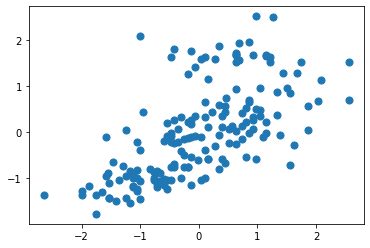

In [40]:
plt.scatter(unlabeled_scaled.iloc[:, 0], unlabeled_scaled.iloc[:,1], s= 50)

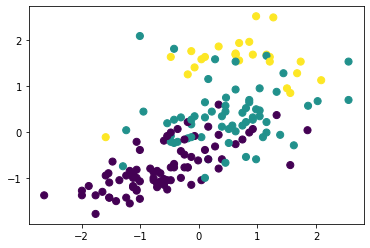

In [41]:
from sklearn.cluster import KMeans
est = KMeans(3)
est.fit(unlabeled_scaled)
y_means = est.predict(unlabeled_scaled)
plt.scatter(unlabeled_scaled.iloc[:,0], unlabeled_scaled.iloc[:, 1], c=y_means, s=50)

In [43]:
drafted_unlabeled = drafted.drop(['PB', 'PB_Select'], axis=1)
drafted_unlabeled = drafted_unlabeled.dropna(axis=1)
drafted_unlabeled = drafted_unlabeled.drop('Year', axis=1)
drafted_unlabeled = drafted_unlabeled.select_dtypes(include=['float64'])
drafted_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Height (in)      108 non-null    float64
 1   Weight (lbs)     108 non-null    float64
 2   40 Yard          108 non-null    float64
 3   Bench Press      108 non-null    float64
 4   Vert Leap (in)   108 non-null    float64
 5   Broad Jump (in)  108 non-null    float64
 6   Shuttle          108 non-null    float64
 7   3Cone            108 non-null    float64
 8   Round            108 non-null    float64
 9   Pick             108 non-null    float64
 10  To               108 non-null    float64
 11  AP1              108 non-null    float64
 12  St               108 non-null    float64
 13  Solo             108 non-null    float64
 14  Int              108 non-null    float64
 15  Sacks            108 non-null    float64
 16  Solos_Per_Year   108 non-null    float64
 17  Ints_Per_Year   

In [44]:
scaler = preprocessing.StandardScaler().fit(drafted_unlabeled)
drafted_scaled = scaler.transform(drafted_unlabeled)
drafted_scaled = pd.DataFrame(drafted_scaled)

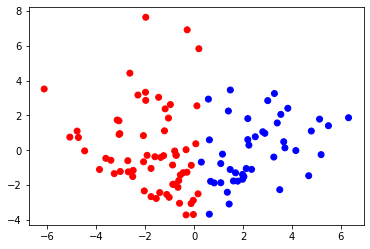

In [49]:
import matplotlib.colors

model = KMeans(n_clusters = 2)
cluster_assignments = model.fit_predict(drafted_scaled)

cmap = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

pca = PCA(n_components=2)
pc1, pc2 = zip(*pca.fit_transform(drafted_scaled))
plt.scatter(pc1, pc2, c=cluster_assignments.tolist(), cmap = cmap)

Text(0, 0.5, 'Proportion of variance Explained')

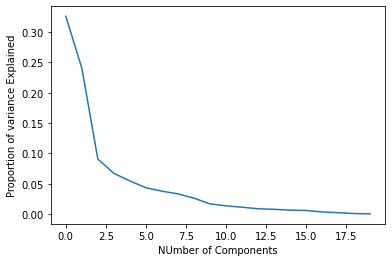

In [50]:
pca = PCA()
pca.fit(drafted_scaled)

variance = pca.explained_variance_ratio_

plt.plot(range(len(variance)), variance)

plt.xlabel('NUmber of Components')
plt.ylabel('Proportion of variance Explained')


In [51]:
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)
X_principle = pca.fit_transform(drafted_scaled)
X_principle = pd.DataFrame(X_principle)
X_principle.columns=['P1', 'P2']


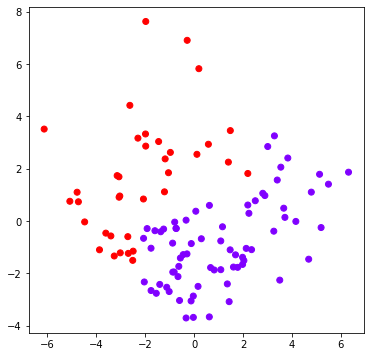

In [53]:
agglo = AgglomerativeClustering(n_clusters=2)
agg = agglo.fit_predict(X_principle)

plt.figure(figsize=(6,6))
plt.scatter(X_principle['P1'], X_principle['P2'], c = agg, cmap='rainbow')


In [69]:
height_weight = draft_df[['Height (in)', 'Weight (lbs)']]
height_weight.info()
print(draft_df.POS.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Height (in)   168 non-null    float64
 1   Weight (lbs)  168 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB
['DE' 'DT' 'FS' 'OLB' 'SS' 'CB' 'ILB']


In [60]:
scaler = preprocessing.StandardScaler().fit(height_weight)
hw_scaled = scaler.transform(height_weight)


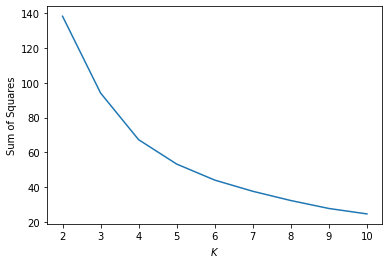

In [61]:
krange = list(range(2, 11))

ss = []

assignments = {}

for k in krange:
    kmeans = KMeans(n_clusters=k)
    k_predict = kmeans.fit_predict(hw_scaled)
    centroid = kmeans.cluster_centers_
    ss.append(np.sum((hw_scaled - centroid[k_predict]) ** 2))
    assignments[str(k)] = k_predict
    
_ = plt.plot(krange, ss)
_ = plt.xlabel("$K$")
_ = plt.ylabel("Sum of Squares")

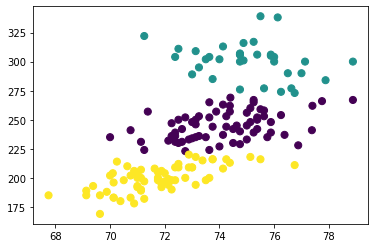

In [72]:
kmeans = KMeans(n_clusters = 3)
k_predict = kmeans.fit_predict(height_weight)
plt.scatter(height_weight.iloc[:, 0], height_weight.iloc[:, 1], c=k_predict, s=50)